# Palmer Penguins Dataset Analysis

## Table of Contents

- [Q1) Basic Descriptive Statistical Information](#q1-basic-descriptive-statistical-information)
- [Q2) Species-Specific Analysis](#q2-species-specific-analysis)
- [Q3) Sex-Based Comparisons](#q3-sex-based-comparisons)
- [Q4) Relationship Between Variables](#q4-relationship-between-variables)
- [Q5) Island-Specific Insights](#q5-island-specific-insights)



In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')


In [7]:
penguins_df = pd.read_csv('penguins.csv')

In [8]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Statistics 

In [212]:
penguins_df.columns

# Extract the continous variables 
cols = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']

def min_max(group):
    return group.max() - group.min()


print('Statistics for continuous vars')
for feat in cols: 
    grouped_penguins = penguins_df.groupby('species')[feat].agg(['max', 'min','mean', 'std'])
    
    grouped_penguins['min_max'] = penguins_df.groupby('species')[feat].apply(min_max)
    
    print('{}'.format(feat))
    print(grouped_penguins)
    print("\n")
    

Statistics for continuous vars
bill_length_mm
            max   min       mean       std  min_max
species                                            
Adelie     46.0  32.1  38.791391  2.663405     13.9
Chinstrap  58.0  40.9  48.833824  3.339256     17.1
Gentoo     59.6  40.9  47.504878  3.081857     18.7


bill_depth_mm
            max   min       mean       std  min_max
species                                            
Adelie     21.5  15.5  18.346358  1.216650      6.0
Chinstrap  20.8  16.4  18.420588  1.135395      4.4
Gentoo     17.3  13.1  14.982114  0.981220      4.2


flipper_length_mm
             max    min        mean       std  min_max
species                                               
Adelie     210.0  172.0  189.953642  6.539457     38.0
Chinstrap  212.0  178.0  195.823529  7.131894     34.0
Gentoo     231.0  203.0  217.186992  6.484976     28.0


body_mass_g
              max     min         mean         std  min_max
species                                          

## Q1) 

- Does the data have an even sex split?
- Does the data have an even island split?
- What is the data distribution for diffrent penguins species like?

<Axes: xlabel='island', ylabel='Count'>

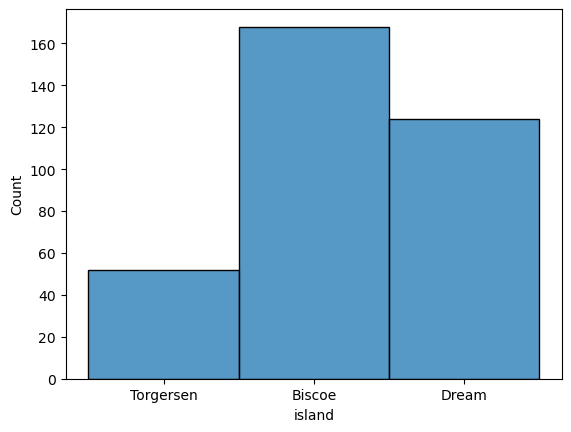

In [220]:
sns.histplot(data = penguins_df, x = 'island')

<Axes: xlabel='sex', ylabel='Count'>

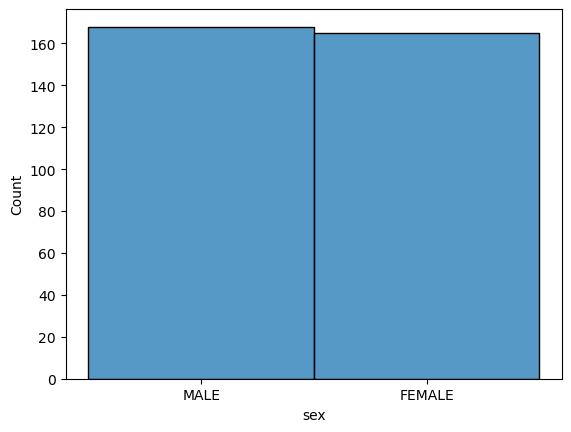

In [221]:
sns.histplot(data = penguins_df, x = 'sex')

<Axes: xlabel='species', ylabel='Count'>

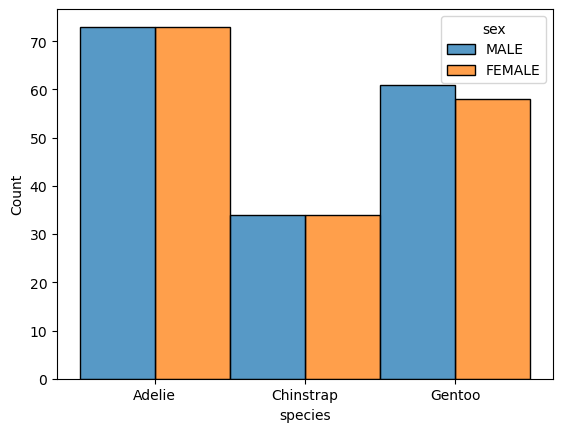

In [222]:
sns.histplot(data = penguins_df, x = 'species', hue = 'sex',multiple="dodge")

## Q2) Species-Specific Analysis
- How do bill length and bill depth vary by species?
- Are there any significant differences in flipper length and body mass between different penguin species?


Text(0.5, 1.0, 'Variation of Bill Length and Depth vs Species')

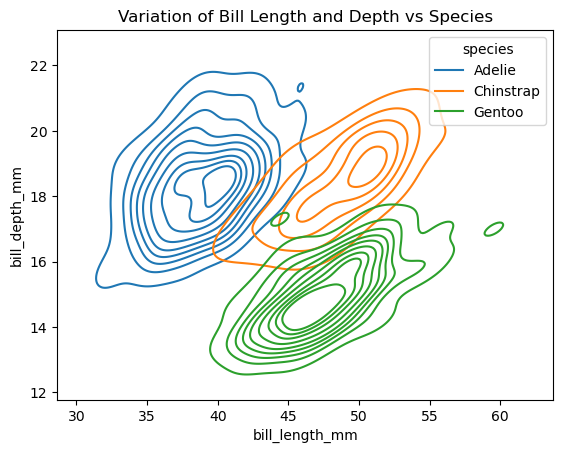

In [86]:
sns.kdeplot(data=penguins_df, x="bill_length_mm", y="bill_depth_mm", 
            hue="species").set_title('Variation of Bill Length and Depth vs Species')


Text(0.5, 1.0, 'Variation of Flipper Length and Body Mass vs Species')

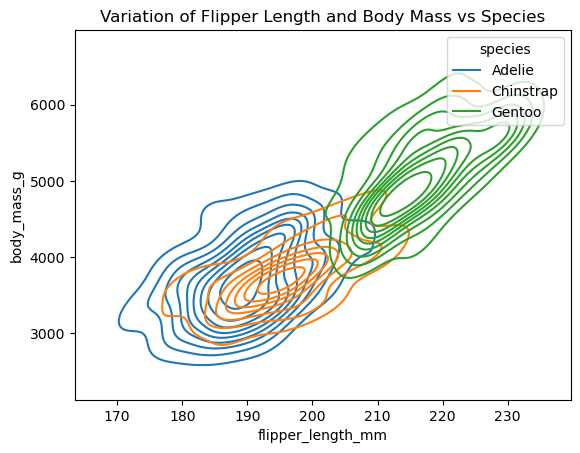

In [88]:
sns.kdeplot(data=penguins_df, x="flipper_length_mm", y="body_mass_g", 
            hue="species").set_title('Variation of Flipper Length and Body Mass vs Species')

## Q3) Sex-Based Comparisons
- How do male and female penguins differ in terms of bill length/depth, flipper length, and body mass?


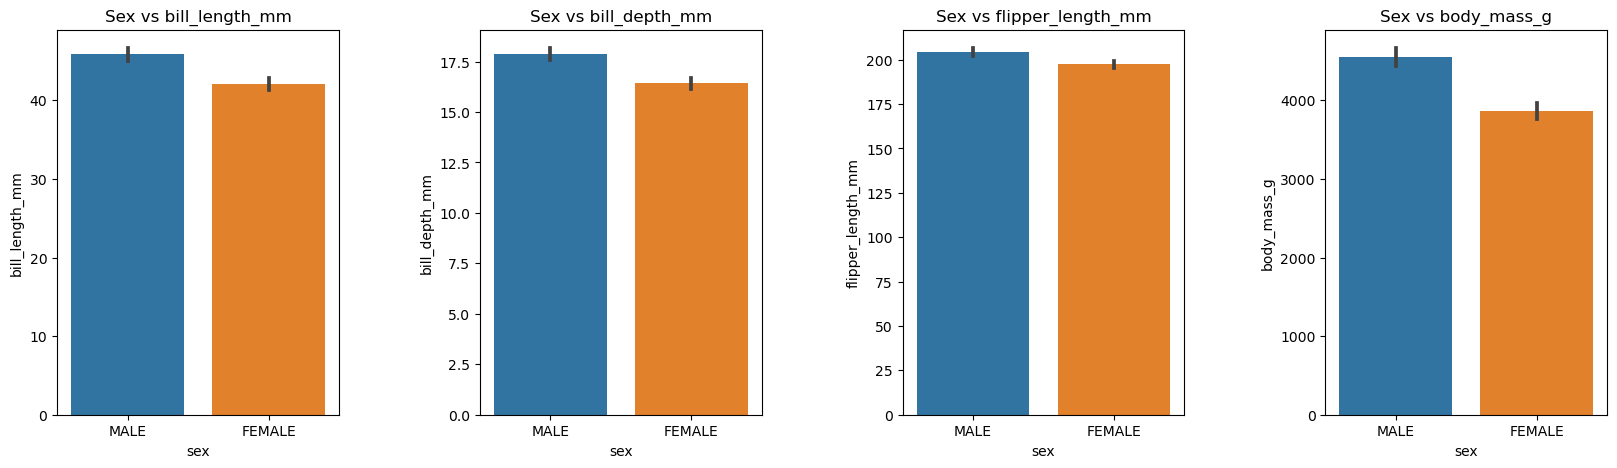

In [205]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5, hspace=5)

feats = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, feat in enumerate(feats):  
    sns.barplot(data=penguins_df, x='sex', y=feat, ax=axes[i])
    axes[i].set_title('Sex vs {}'.format(feat))

plt.show()



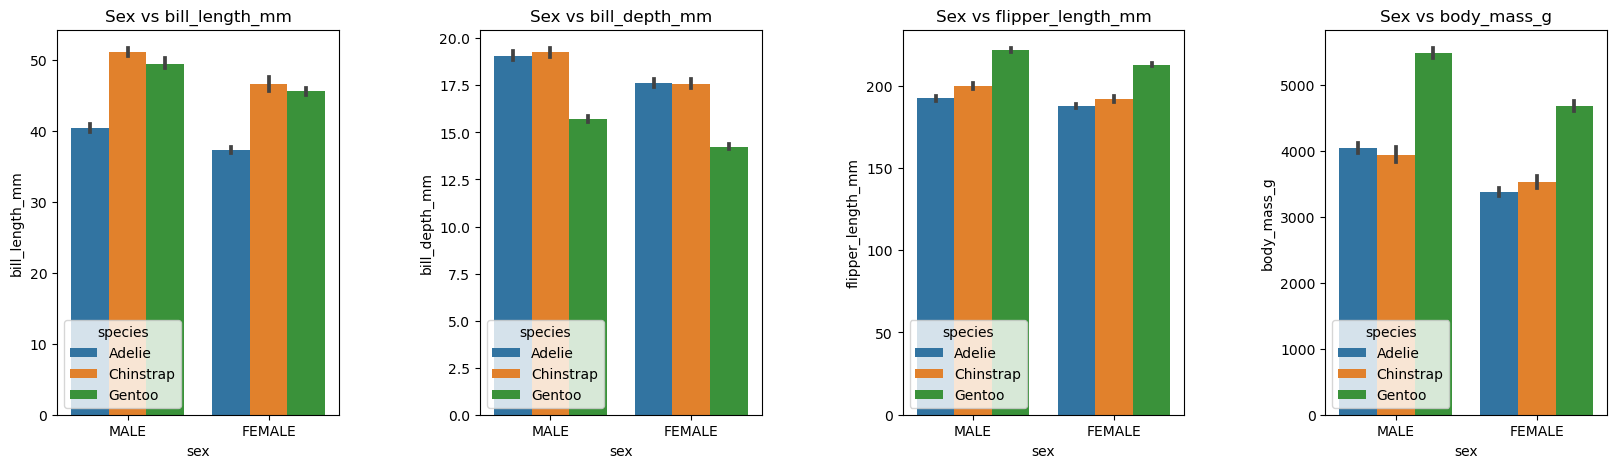

In [206]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5, hspace=5)

feats = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, feat in enumerate(feats):  
    sns.barplot(data=penguins_df, x='sex', y=feat, hue = 'species', ax=axes[i])
    axes[i].set_title('Sex vs {}'.format(feat))

plt.show()


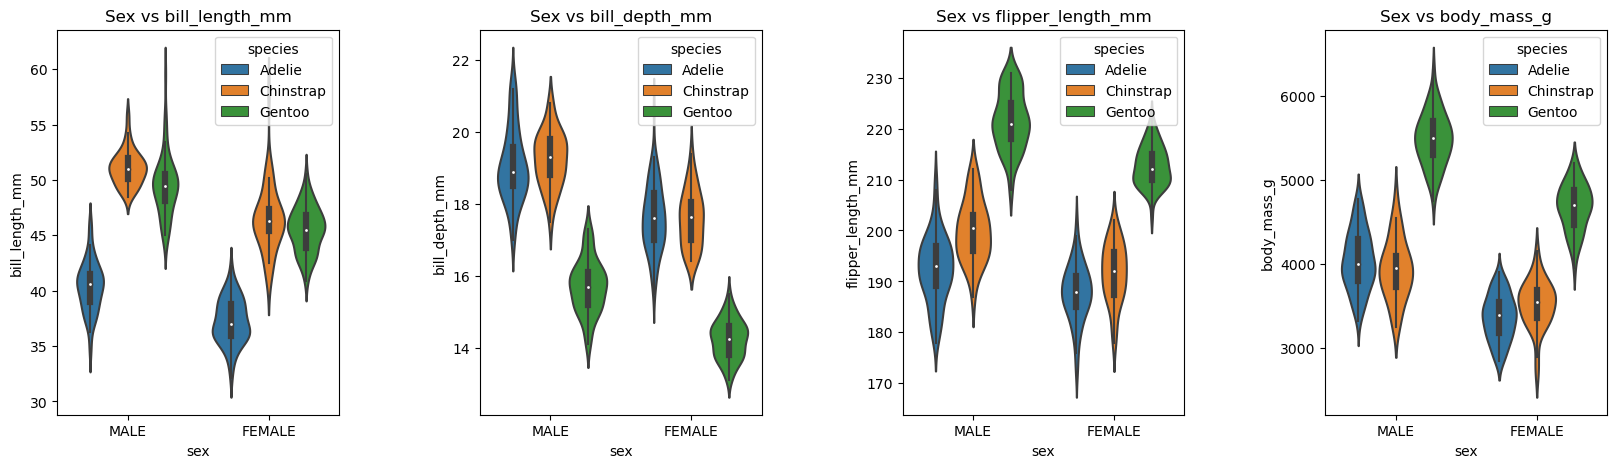

In [207]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5, hspace=5)

feats = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, feat in enumerate(feats):  
    sns.violinplot(data=penguins_df, x='sex', y=feat, hue = 'species', ax=axes[i])
    axes[i].set_title('Sex vs {}'.format(feat))

plt.show()



## Q4) Relationship Between Variables
- What is the relationship between bill length and body mass? (correlation)
- What is the relationship between flipper length and body mass?
- Can bill depth be used to predict species or other physical characteristics?

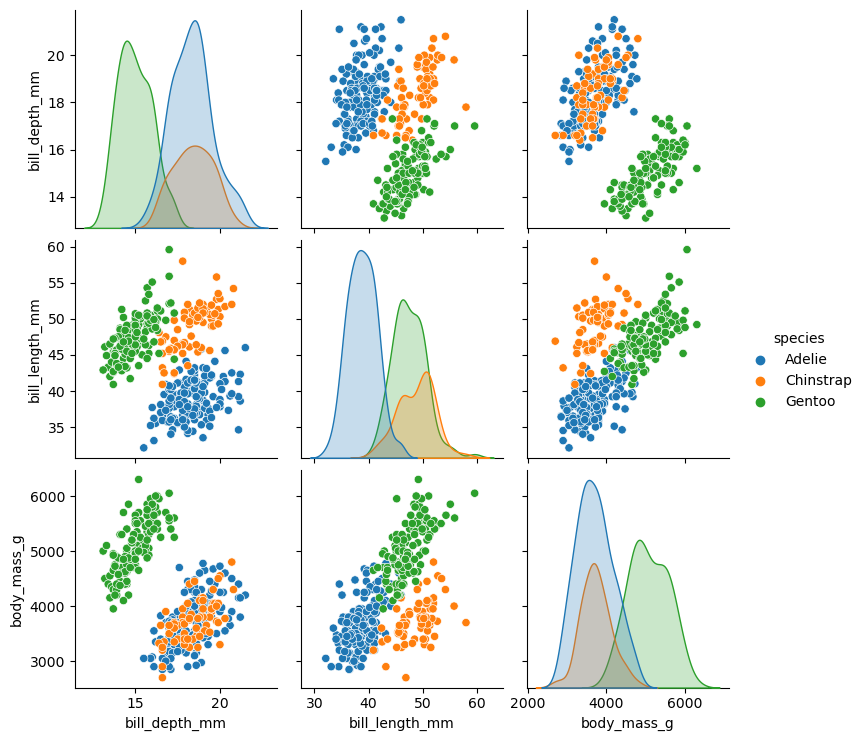

In [199]:
sns.pairplot(data = penguins_df, hue = 'species' , vars=['bill_depth_mm', 'bill_length_mm', 'body_mass_g'])
plt.show()


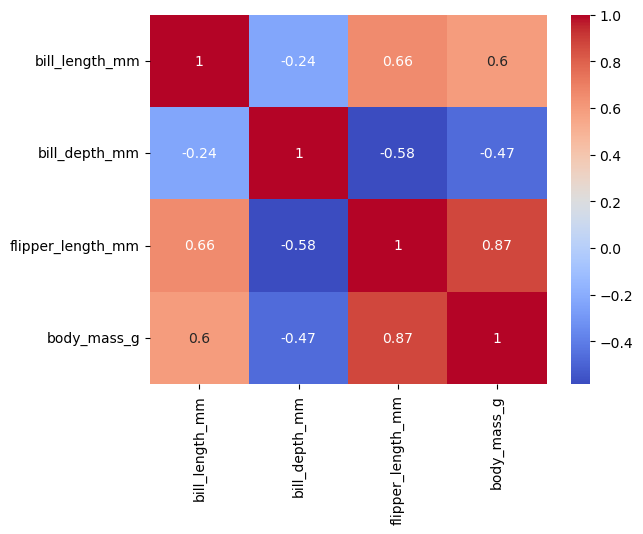

In [217]:
# Select only numeric columns
numeric_df = penguins_df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix 
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


From this heatmap we can infer that we should compare:

- Flipper length vs body mass
- Flipper length vs bill length
- Bill length vs body mass

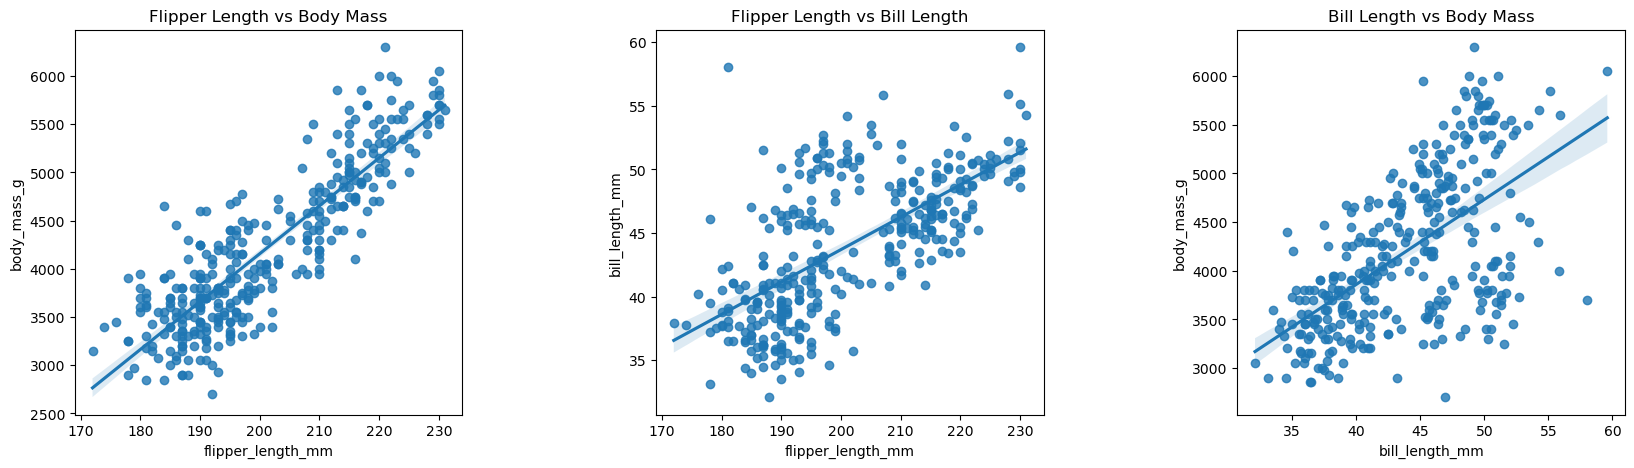

In [216]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

sns.regplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g', ax=axes[0])
axes[0].set_title('Flipper Length vs Body Mass')

sns.regplot(data=penguins_df, x='flipper_length_mm', y='bill_length_mm', ax=axes[1])
axes[1].set_title('Flipper Length vs Bill Length')

sns.regplot(data=penguins_df, x='bill_length_mm', y='body_mass_g', ax=axes[2])
axes[2].set_title('Bill Length vs Body Mass')

plt.show()



## Q5) Island-Specific Insights
- Do penguins from different islands show variations in body size or bill dimensions?
- Are certain species more prevalent on particular islands?

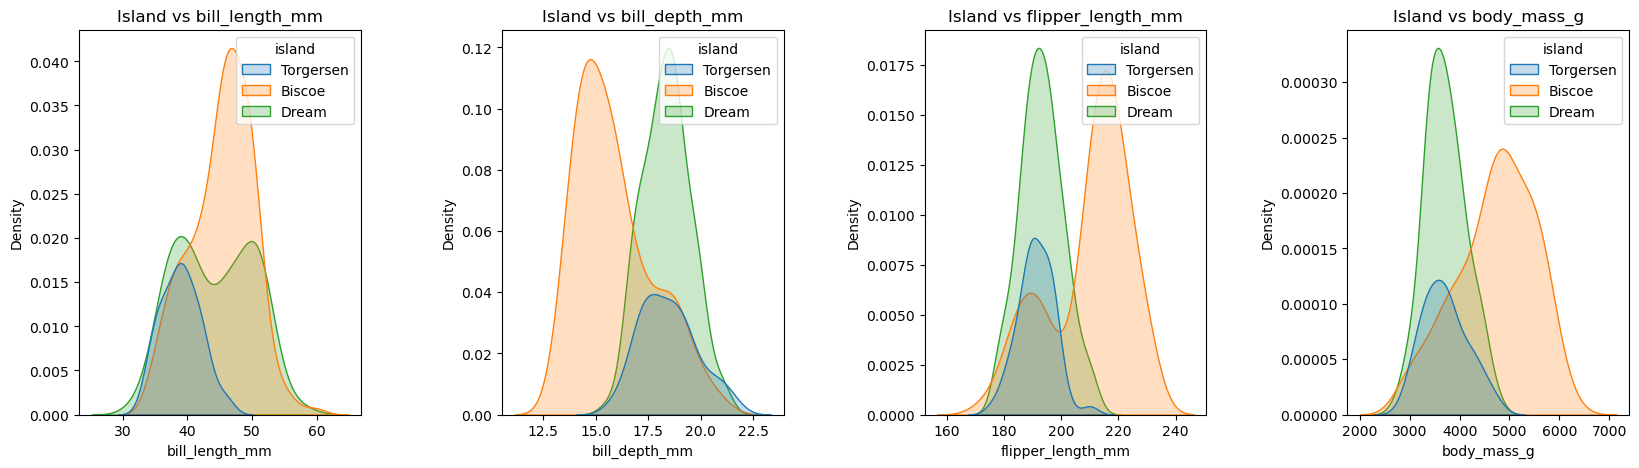

In [219]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(wspace=0.5, hspace=5)

feats = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, feat in enumerate(feats):  
    sns.kdeplot(data=penguins_df, x= feat, hue = 'island', fill = True, ax=axes[i])
    axes[i].set_title('Island vs {}'.format(feat))

plt.show()


<Axes: xlabel='species', ylabel='count'>

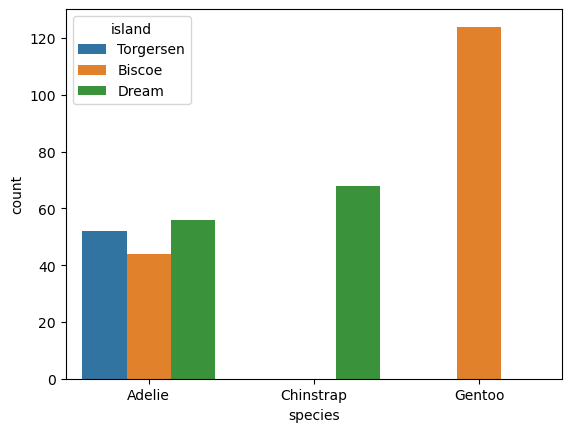

In [210]:
sns.countplot(data=penguins_df, x="species", hue="island")

<Axes: xlabel='species', ylabel='island'>

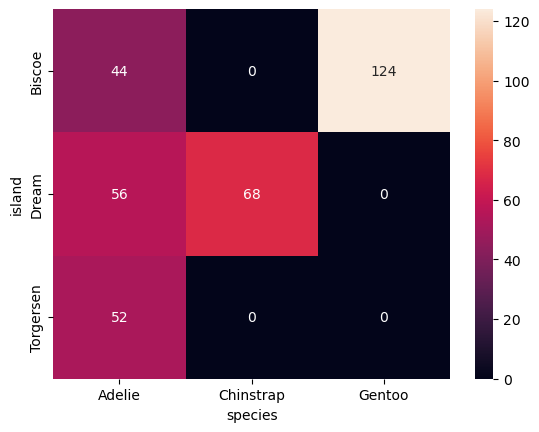

In [211]:
cross_tab = pd.crosstab(penguins_df['island'], penguins_df['species'])

sns.heatmap(cross_tab, annot = True, fmt = 'd')